# Part I - GoBike System Data Exploration
## by Nguyen Huu Tuan

## Introduction
In part 1, based on data such as age, starting station, ending station, user type and gender to predict the travel time of each trip.


## Preliminary Wrangling


In [79]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [80]:
# Load dataset into dataframe
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [81]:
# Get count column and rows
df.shape

(183412, 16)

In [82]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset for fordgobike contains a total of 183,411 rowa and 16 columns ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). In the dataset, have 7 columns float, 2 columms int and 7 columns object.
Column 'start_time' and 'and_time' are time, I will convert from object to datetime.
### What is/are the main feature(s) of interest in your dataset?

In project, I will focus is to analyze the relationship between riding duration and various other features such as start station, end station, user type, age and gender within the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duration will have the strongest effect on each the start stations and end stations becouse the crowded places should receive more rides. Furthermore, user type, age, and gender are factors that I expect will also contribute to variations in trip duration.

In [83]:
# Convert column 'start_time' and 'end_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## Univariate Exploration


### Percentage bike rides of Gender

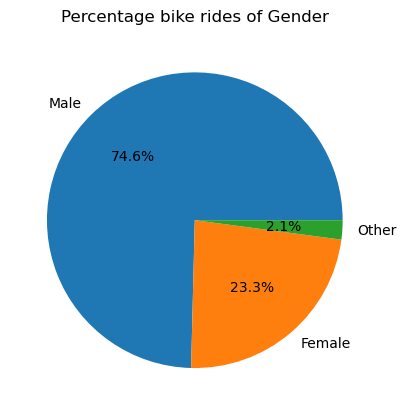

In [85]:
# Plotting genders 
member_genders = df['member_gender'].value_counts(normalize=True).mul(100).round(1)
fig, ax = plt.subplots()
plt.title('Percentage bike rides of Gender', y=1.015)
ax.pie(member_genders.values, labels=member_genders.index, autopct='%1.1f%%')
plt.show()

The majority of riders are male and account for about 75%, and female riders account for about 23%.

### Distribution of Age

I will check range of age in data set by simple calculating. Because dataset in 2019, so i base on 2019 to demermine age of user

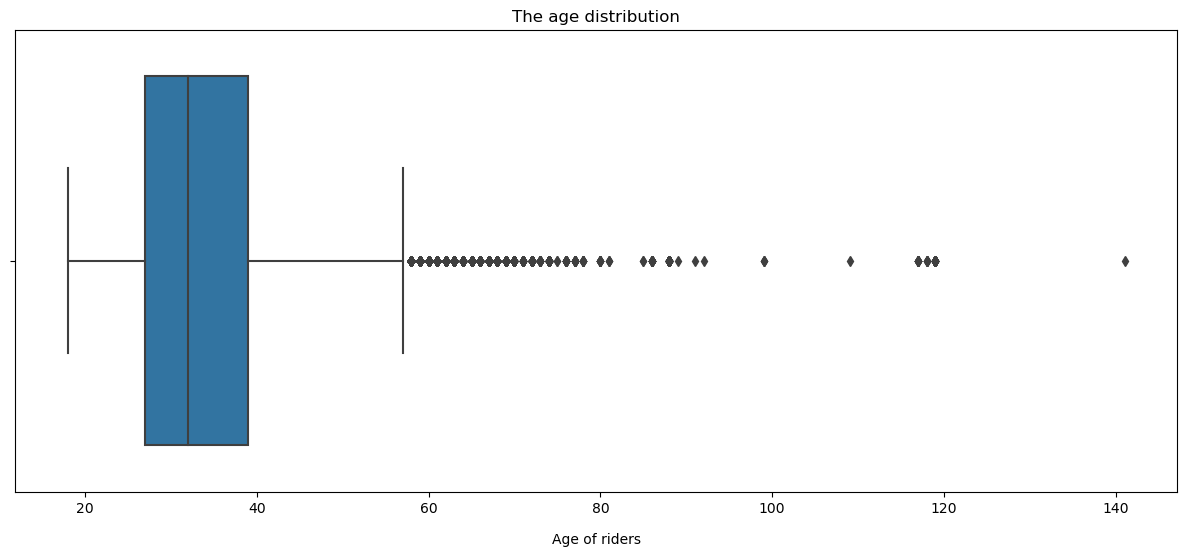

In [86]:
# Calculate age
df['age'] = 2019 - df['member_birth_year']

plt.figure(figsize=(15,6))
sb.boxplot(x='age', data=df, orient='h')
plt.title("The age distribution", y=1)
plt.xlabel("Age of riders", labelpad=12)
plt.show()

In the case of age, you can see that the distribution is more concentrated between 25 to 40 years old.

### Distribution of Use Type

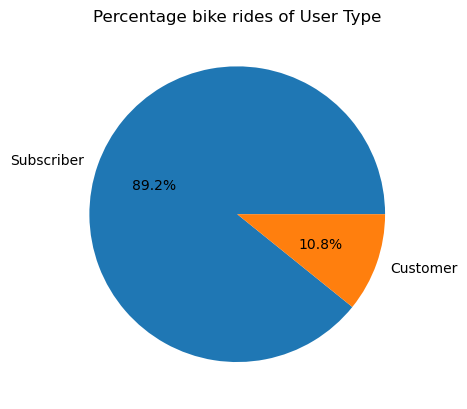

In [87]:
# Plotting types of users 
user_types = df['user_type'].value_counts(normalize=True).mul(100).round(1)
fig, ax = plt.subplots()
plt.title('Percentage bike rides of User Type', y=1)
ax.pie(user_types.values, labels=user_types.index, autopct='%1.1f%%')
plt.show()

As the graph shows, the majority of user type is subscriber.

### Count of daily bike rides

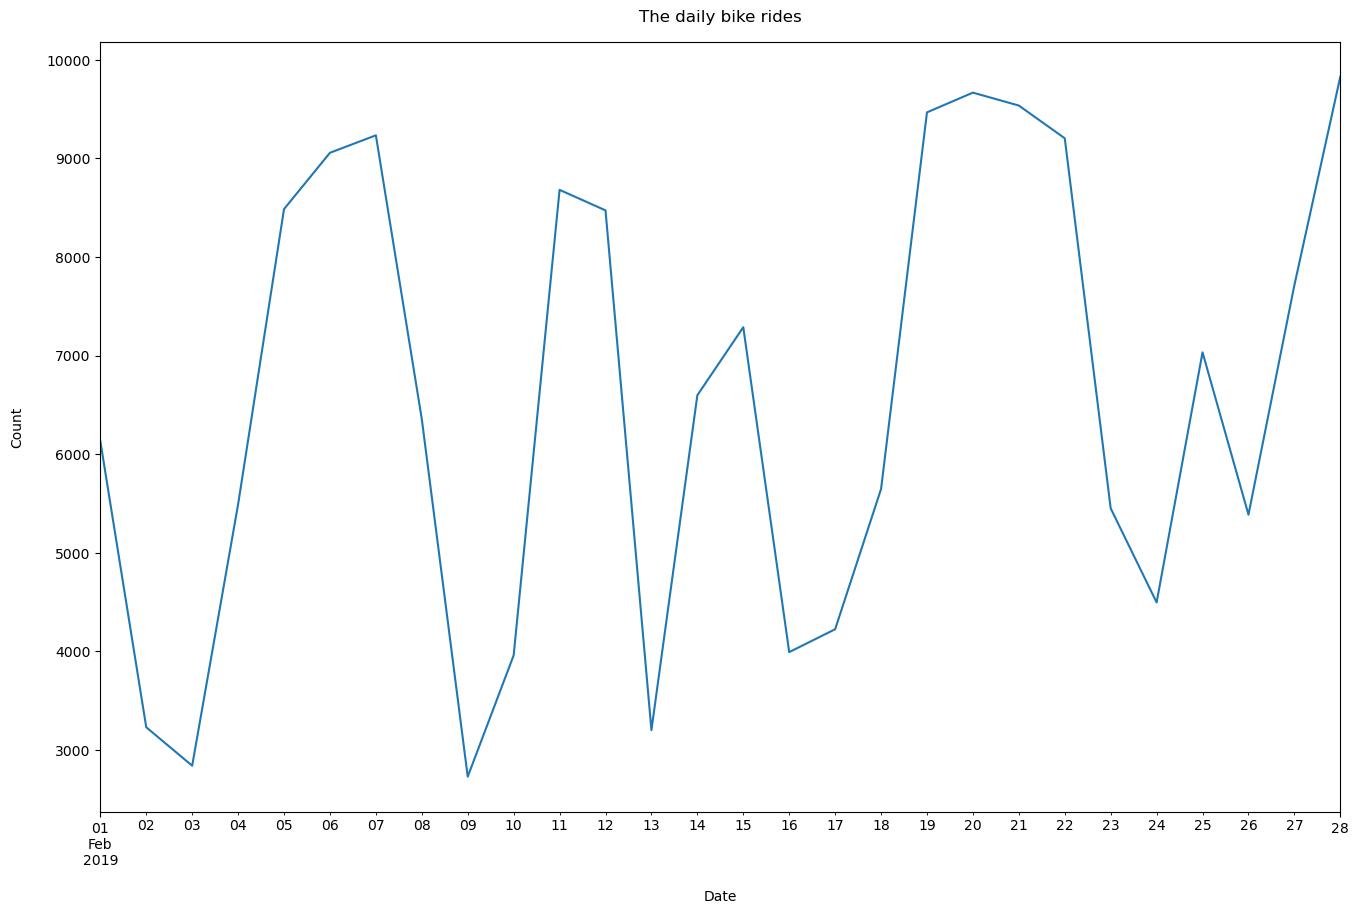

In [88]:
df.groupby(pd.Grouper(freq='D', key='start_time'))['bike_id'].count().plot(style='-', legend=False, figsize=(16,10))
plt.title('The daily bike rides', y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)
axis = plt.gca()

- On days 3, 9, 13, 16, 24 and 26, the number of riders decreases.
- The number of people going increases on the 7th, 11th, 15th, 20th, 28th of every month
- However, in general, the number of people traveling during the month tends to increase gradually from the beginning of the month to the end of the month

### Bike rider per weekday

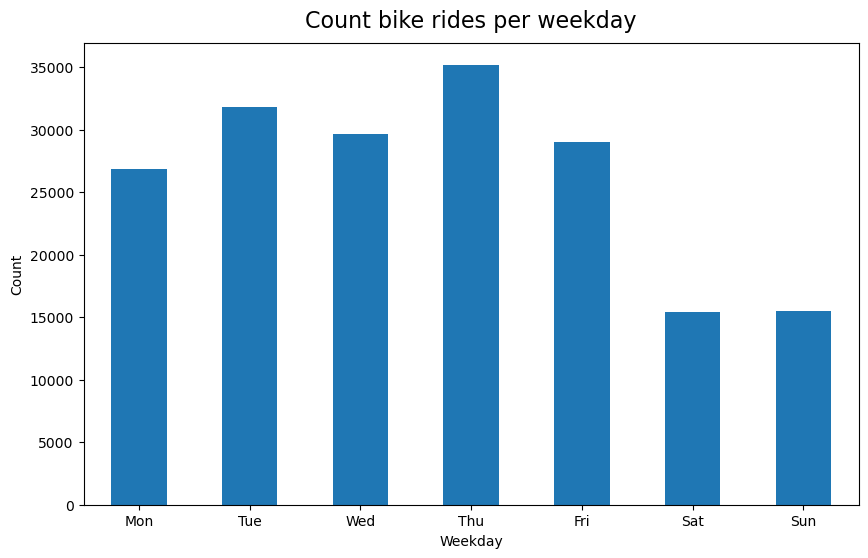

In [89]:
import calendar

df['weekday'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df_weekday_trips = df.groupby('weekday').agg({'bike_id':'count'})
days_ordered = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_weekday_trips = df_weekday_trips.reindex(days_ordered)
df_weekday_trips.plot(kind='bar', figsize=(10,6), legend=False)
plt.title('Count bike rides per weekday', fontsize=16, y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

Fewer people ride on weekends than during the week.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Riders aged 25 - 40 make up the majority of daily riders
- We see that age also affects the number of riders, the older the age, the lower the ratio of riders
- The majority of riders are male and user type is subscriber
- The rider rate on weekdays is higher than on weekends

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I had to calculate age and age group, group by day to be able to show the distribution by age, the distribution by day. Then I found no unusual distributions among the features I investigated except for age, which spans from 18 to ~140 as shown by the histogram.

## Bivariate Exploration

#### Trip duration of genders

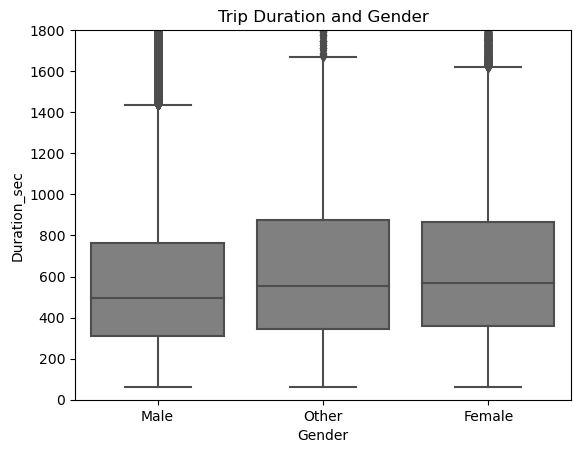

In [90]:
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = 'gray')
plt.ylim([0, 1800])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

Interestingly, although number of male riders are very high then other and female but we can see that higher percentage of female and other rides longer trips then males 

#### Average trip duration of customers vs subscribers

Text(0.5, 0, 'Trip duration in seconds')

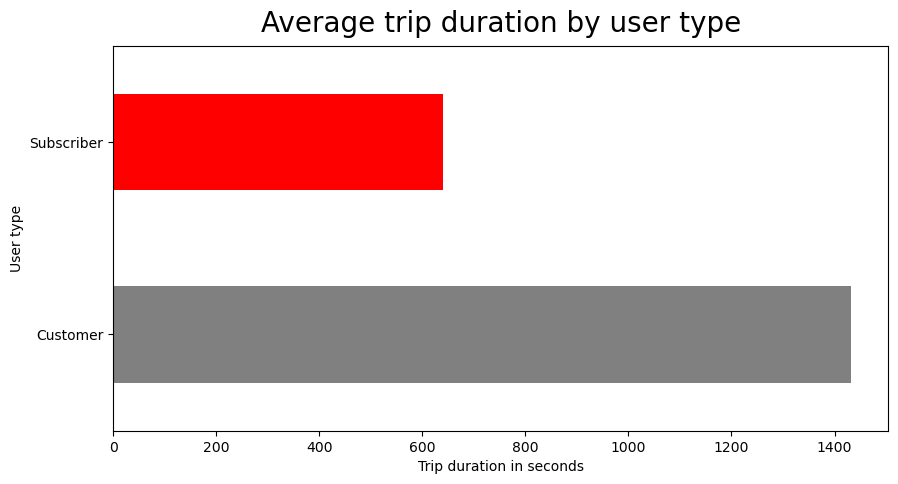

In [91]:
colors=['gray', 'red']
axis = df.groupby('user_type')['duration_sec'].mean().plot(kind='barh', color=colors, figsize=(10, 5))
axis.set_title('Average trip duration by user type', fontsize=20, y=1.015)
axis.set_ylabel('User type')
axis.set_xlabel('Trip duration in seconds')

Although the number of users is mainly subscribers, the travel time is much less than that of customers

#### User trends of bike rides of customers vs subscribers

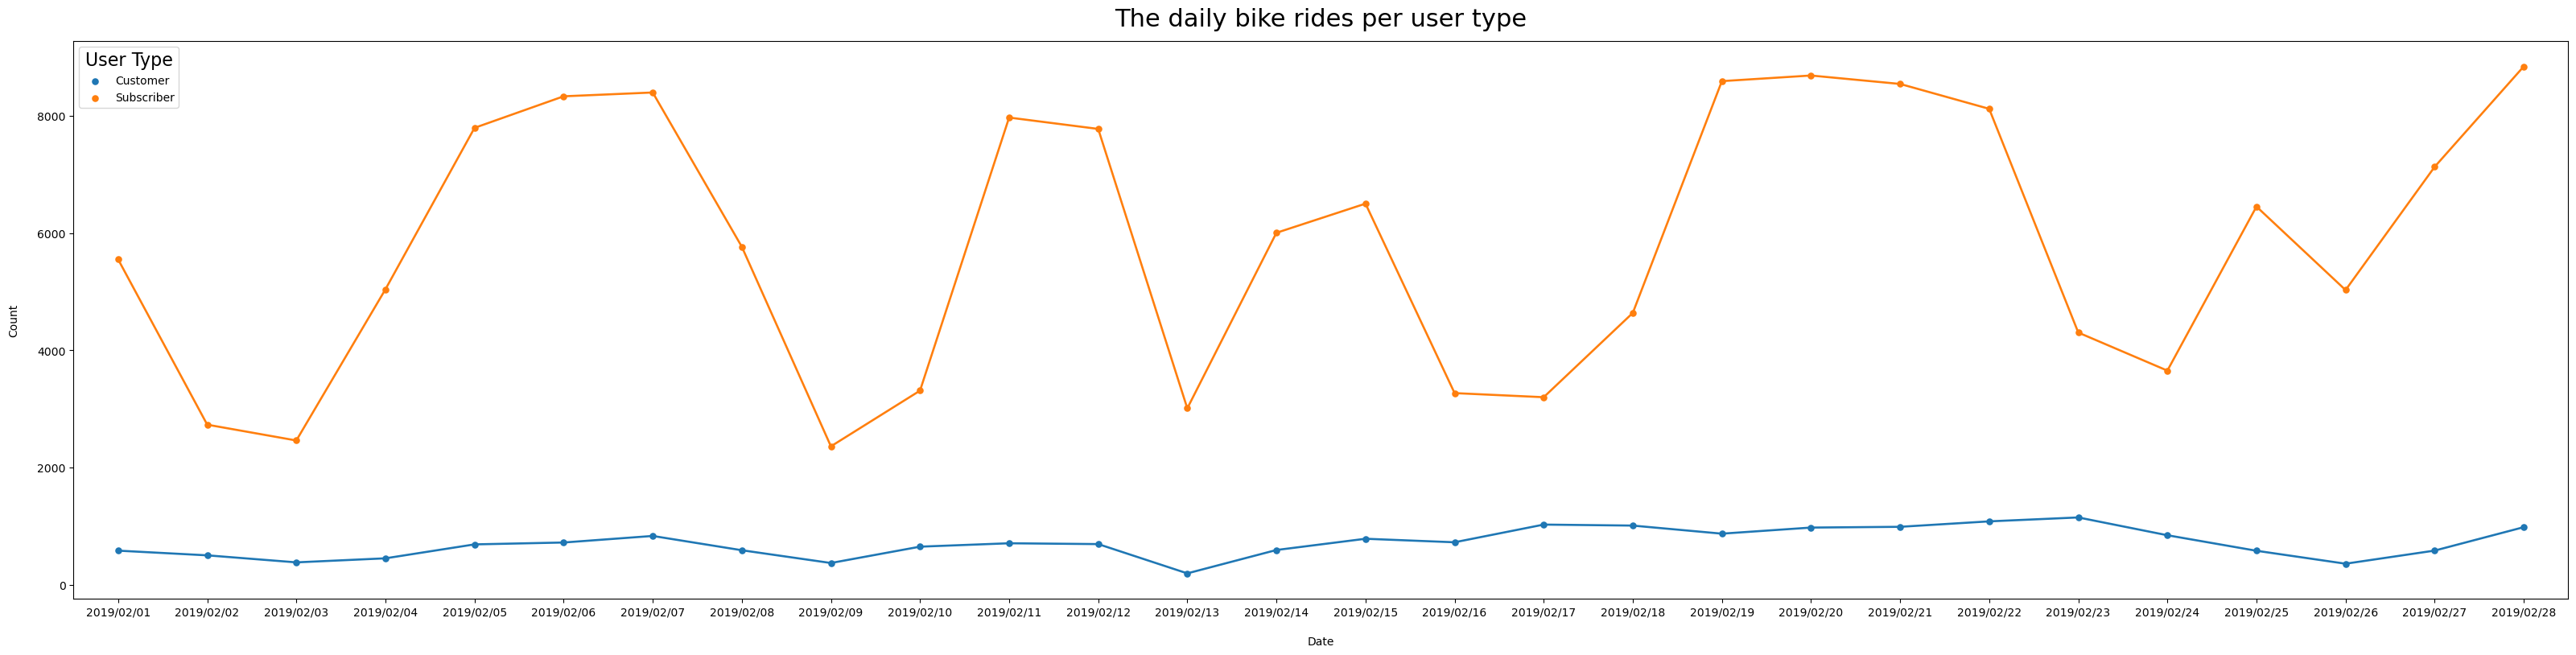

In [92]:
# Get date from column 'start_date'
df['date'] = df['start_time'].dt.strftime('%Y' + '/' + '%m' + '/' + '%d')
df_user_type_count = df.groupby(['user_type', 'date']).size().reset_index()

plt.figure(figsize=(40, 9))
axis = sb.pointplot(x='date', y=0, hue='user_type', scale=.7, data=df_user_type_count)
plt.title('The daily bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)
leg = axis.legend()
leg.set_title('User Type',prop={'size':16})

- Customers seem to stay steady.
- Subscribers increase on days 1, 6, 11, 15, 20, 25, 28 and decrease on days 3, 9, 13, 17, 24. It can be speculated that the 4-5 day cycle will increase

### Average trip duration of Age Group

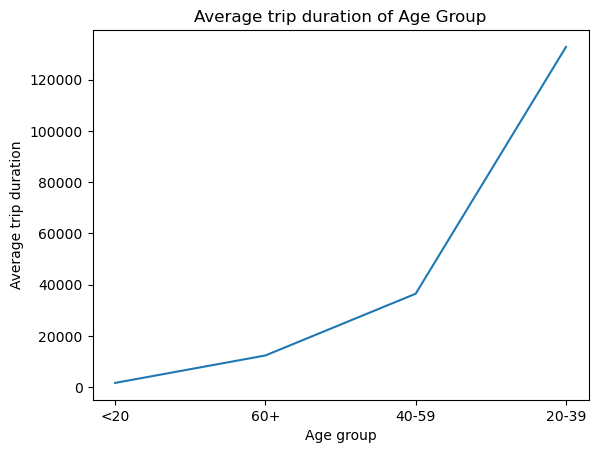

In [93]:
df['age_group'] = df['age'].apply(lambda x: '<20' if x<20
                                                      else '20-39' if 20<=x<40
                                                      else '40-59' if 40<=x<60
                                                      else '60+')
df_age_group_duration = df.groupby(['age_group']).agg({'duration_sec': 'count'})
df_age_group_duration = df_age_group_duration.sort_values('duration_sec')
# Create a simple line plot
plt.plot(df_age_group_duration.index, df_age_group_duration['duration_sec'])

# Add labels and title
plt.xlabel('Age group')
plt.ylabel('Average trip duration')
plt.title('Average trip duration of Age Group')

# Show the chart
plt.show()

By looking at the chart above, we can see that most frequent users aged between 20 and 39. As remark, duration is registered by younger members.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- There is a drop in subscribers on weekends and it seems people will tend to use the service on weekdays (peaking midweek).

- Trip Duration is so dependendable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- For gender, value of male members is very high but it got lower trip duration. 
- For user type, value of subscriber members is very high but it got lower trip duration then customer.

## Multivariate Exploration

In [94]:
df['start_time_hour'] = df['start_time'].dt.hour

def subscriber_hour_age_group_user_type(age_group, user_type):
    subscriber_hour_dataFrame = df[(df['start_time_hour'] > 5) & (df['user_type'] == user_type)
                                  ].groupby(['weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

    subscriber_hour = df[(df['age_group']== age_group) & (df['start_time_hour'] > 5) & (df['user_type'] == user_type)
                        ].groupby(['weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
    subscriber_hour['weekday'] = pd.Categorical(subscriber_hour['weekday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
    subscriber_hour['count_percentage'] = subscriber_hour['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum()) * 100)
    subscriber_hour['rank'] = subscriber_hour['count_percentage'].rank(ascending=False).astype(int)
    pivot_df = subscriber_hour.pivot_table(index='start_time_hour', columns='weekday', values='rank')
    for col in pivot_df.columns:
        pivot_df[col] = pd.to_numeric(pivot_df[col]).convert_dtypes().fillna(-1).astype(int)
    return pivot_df

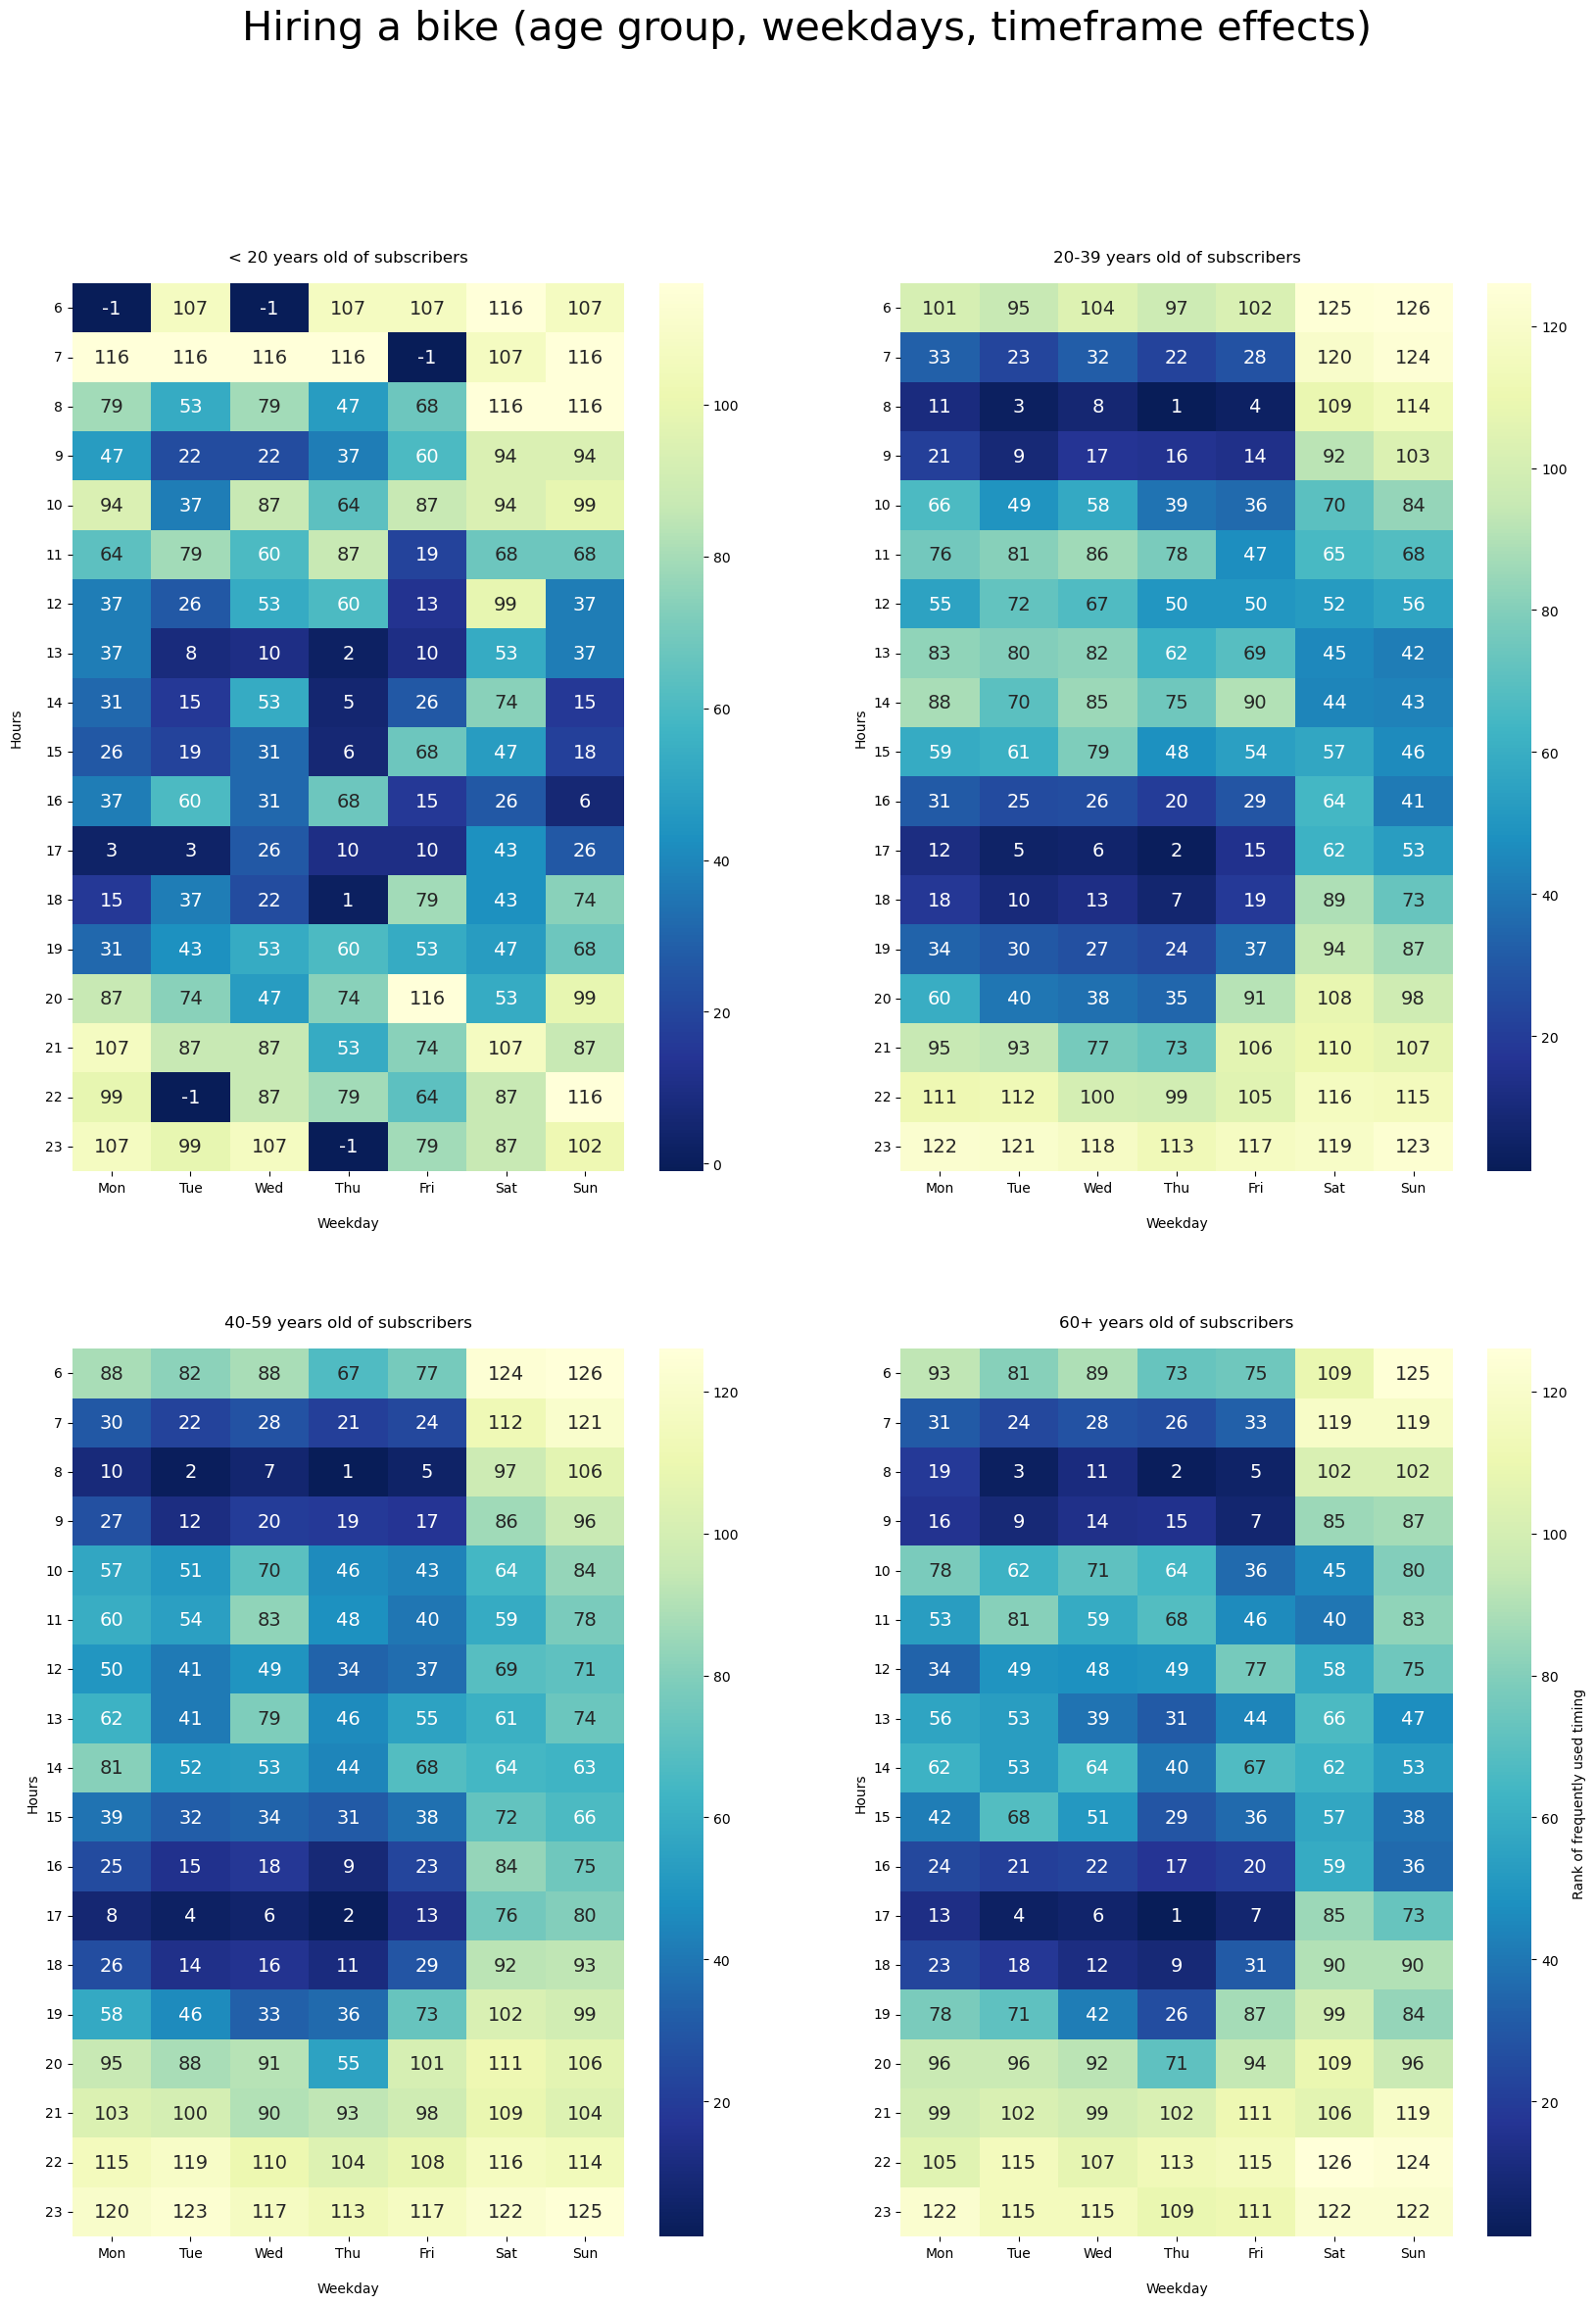

In [95]:
df_subscriber_hour_lesser_20 = subscriber_hour_age_group_user_type('<20', 'Subscriber')
df_subscriber_hour_20_39 = subscriber_hour_age_group_user_type('20-39', 'Subscriber')
df_subscriber_hour_40_59 = subscriber_hour_age_group_user_type('40-59', 'Subscriber')
df_subscriber_hour_elder_60 = subscriber_hour_age_group_user_type('60+', 'Subscriber')


plt.figure(figsize=(20,40))
plt.suptitle('Hiring a bike (age group, weekdays, timeframe effects)', fontsize=30, y=0.95)
plt.subplot(321)
sb.heatmap(df_subscriber_hour_lesser_20, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("< 20 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours', labelpad=16)
plt.yticks(rotation=360)

plt.subplot(322)
sb.heatmap(df_subscriber_hour_20_39, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("20-39 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours')
plt.yticks(rotation=360)

plt.subplot(323)
sb.heatmap(df_subscriber_hour_40_59, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("40-59 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours')
plt.yticks(rotation=360)

plt.subplot(324)
sb.heatmap(df_subscriber_hour_elder_60, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("60+ years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours')
plt.yticks(rotation=360)
plt.show()

In [96]:
# Export csv, I will use file in part 2
df.to_csv('fordgobike_tripdata_part2.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I expanded my investigation with three completely different variables such as people, time frames, days of the week. Through exploring these variables, I found that older subscribers have a broader lifespan than others.
- People in the < 20 year olds are as active during their commute as they are driving between 13-15.

- People in the 20 - 39 year old group are active during 7 - 9 hours and 16 - 20 hours.

- People in the 40-59 year olds are as active during their commute as they are driving between 7-9 and 15-19.

- People >=60 years old are as active during work as they are driving during 7-9, 16-18.

### Were there any interesting or surprising interactions between features?

- I was surprised by the numbers in terms of age groups. In a day with different time frames, the biker in the older age group has a more flexible and wider range of activities than the biker in the younger age group.

## Conclusions

 - Service usage times during the day are usually during peak hours. they use the service to move for different purposes such as work, study, trade. The proportion of male bikers is also the majority, in addition, about age, people aged 20-39 have the largest proportion. People often use the service on weekdays and rarely use it on weekends. Also Subscribers' average trip duration is ~ 650 seconds and Customers' average trip duration is ~ 1300 seconds. 